In [63]:
import cv2
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.autograd import Variable
from torch.optim.lr_scheduler import StepLR

# Define your neural network architecture with dropout layers
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=5)
        self.conv2 = nn.Conv2d(16, 64, kernel_size=5)
        self.fc1 = nn.Linear(1024, 128)
        self.fc2 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(0.5)  # Add dropout with a probability of 0.5

    def forward(self, x):
        x = torch.relu(torch.max_pool2d(self.conv1(x), 2))
        x = torch.relu(torch.max_pool2d(self.conv2(x), 2))
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)  # Apply dropout here
        x = self.fc2(x)
        return x

# Data preprocessing and data loader setup with data augmentation
transform = transforms.Compose([
    transforms.RandomRotation(10),  # Randomly rotate the image by up to 10 degrees
    transforms.RandomAffine(0, translate=(0.1, 0.1)),  # Randomly translate the image
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

trainset = torchvision.datasets.MNIST(root='MNIST/raw/train-images-idx3-ubyte', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Initialize the model, loss function, and optimizer
model = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Learning rate scheduling
scheduler = StepLR(optimizer, step_size=3, gamma=0.1)

# Training loop with dropout and learning rate scheduling
for epoch in range(5):
    scheduler.step()  # Update the learning rate at the beginning of each epoch
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = Variable(inputs), Variable(labels)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f'Epoch {epoch + 1}, Loss: {running_loss / len(trainloader)}')

print('Finished Training')

# Save the trained model
torch.save(model.state_dict(), 'mnist_model.pth')


Epoch 1, Loss: 0.498986478827433
Epoch 2, Loss: 0.14487195640468775
Epoch 3, Loss: 0.09784563700817446
Epoch 4, Loss: 0.08711982016979869
Epoch 5, Loss: 0.08264863217916729
Finished Training


In [67]:

import cv2
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.autograd import Variable

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=5)
        self.conv2 = nn.Conv2d(16, 64, kernel_size=5)
        self.fc1 = nn.Linear(1024, 128)
        self.fc2 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(0.5)  # Add dropout with a probability of 0.5

    def forward(self, x):
        x = torch.relu(torch.max_pool2d(self.conv1(x), 2))
        x = torch.relu(torch.max_pool2d(self.conv2(x), 2))
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)  # Apply dropout here
        x = self.fc2(x)
        return x
    
model = Net()

# Load the trained model's state dictionary
model.load_state_dict(torch.load('mnist_model.pth'))

# Set the model to evaluation mode
model.eval()

Net(
  (conv1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(16, 64, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=1024, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

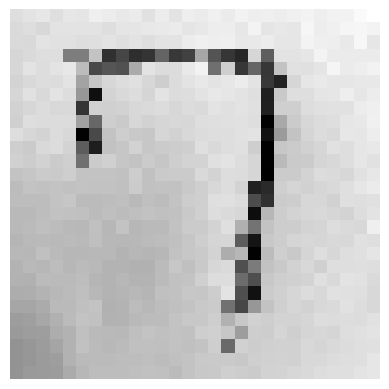

In [68]:
import cv2
import torch
import torchvision.transforms as transforms
from torch.autograd import Variable
import matplotlib.pyplot as plt

# Load and resize your image to 28x28
image_path = '7.jpeg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (28, 28))

# Display the resized image
plt.imshow(image, cmap='gray')
plt.axis('off')  # Hide the axis
plt.show()


In [70]:
image_path = '5.jpeg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (28, 28))
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
image = transform(image).unsqueeze(0)  # Add batch dimension

# Use the trained model for prediction
with torch.no_grad():
    outputs = model(image)
    print(outputs)
    _, predicted = torch.max(outputs, 1)
print(f'Predicted Class: {predicted.item()}')

tensor([[-5.0903, -1.5651, -2.9628, 10.6658, -8.9306, 14.5235, -3.3518, -5.9670,
          1.6749, -0.3078]])
Predicted Class: 5
